# A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Build a Random Forest with target variable Sales converted to a categorical variable.
---

## Data Description

Feature | Description
:-: | :-:
Sales | Unit sales (in thousands) at each location
Competitor Price | Price charged by competitor at each location
Income | Community income level (in thousands of dollars)
Advertising | Local advertising budget for company at each location (in thousands of dollars)
Population | Population size in region (in thousands)
Price | Price company charges for car seats at each site
Shelf Location at stores | A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
Age | Average age of the local population
Education | Education level at each location
Urban | A factor with levels No and Yes to indicate whether the store is in an urban or rural location
US | A factor with levels No and Yes to indicate whether the store is in the US or not

## Data Gathering

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Loading the dataset
df = pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Exploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [4]:
# Getting unique values for each feature
df.nunique()

Sales          336
CompPrice       73
Income          98
Advertising     28
Population     275
Price          101
ShelveLoc        3
Age             56
Education        9
Urban            2
US               2
dtype: int64

Urban, US, ShelveLoc are categorical features

In [5]:
# Checking na values
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

No na values

<Axes: xlabel='Sales', ylabel='Count'>

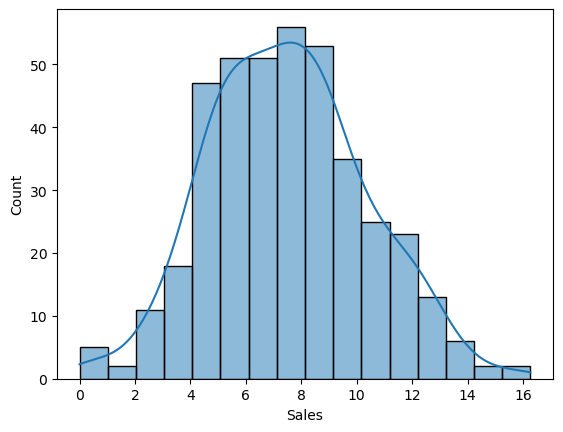

In [6]:
# Histogram for target variable
sns.histplot(df, x = 'Sales', kde = True)

We have to categorize this feature

<Axes: xlabel='CompPrice', ylabel='Count'>

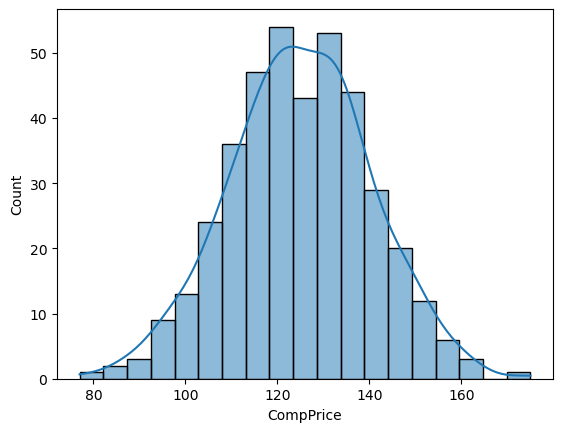

In [7]:
# Histogram for CompPrice
sns.histplot(df, x = 'CompPrice', kde = True)

<Axes: xlabel='Income', ylabel='Count'>

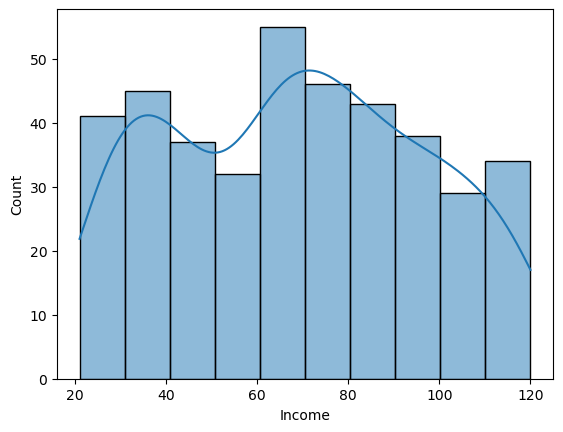

In [8]:
# Histogram for Income
sns.histplot(df, x = 'Income', kde = True)

<Axes: xlabel='Advertising', ylabel='Count'>

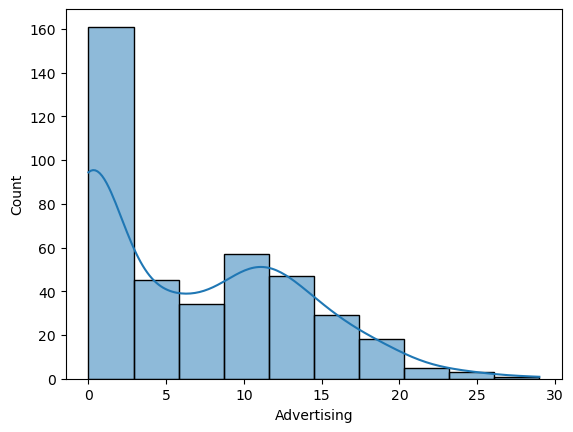

In [9]:
# Histogram for Advertising
sns.histplot(df, x = 'Advertising', kde = True)

<Axes: xlabel='Population', ylabel='Count'>

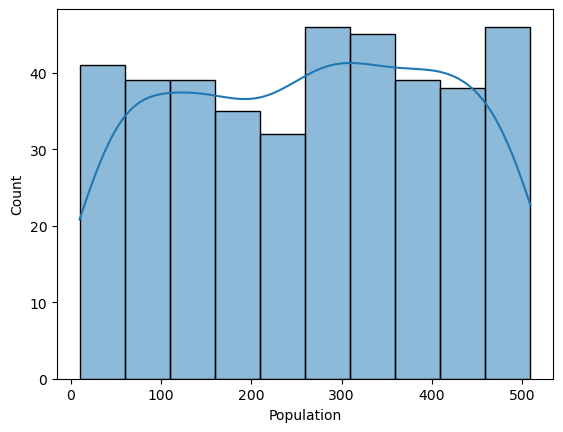

In [10]:
# Histogram for Population
sns.histplot(df, x = 'Population', kde = True)

<Axes: xlabel='Price', ylabel='Count'>

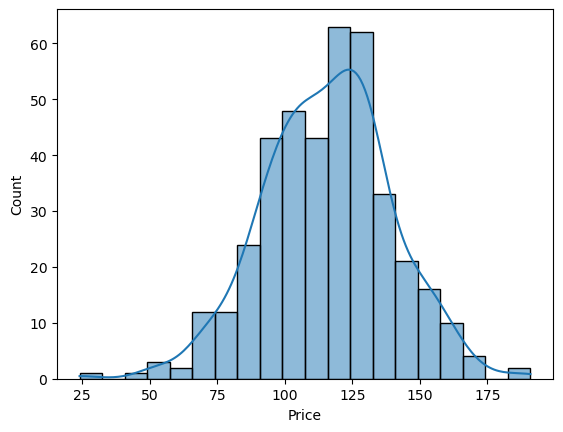

In [11]:
# Histogram for Price
sns.histplot(df, x = 'Price', kde = True)

<Axes: xlabel='ShelveLoc', ylabel='Count'>

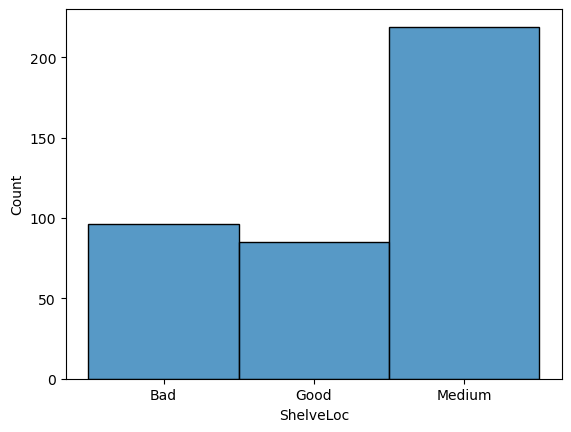

In [12]:
# Countplot for ShelveLoc
sns.histplot(df, x = 'ShelveLoc')

<Axes: xlabel='Age', ylabel='Count'>

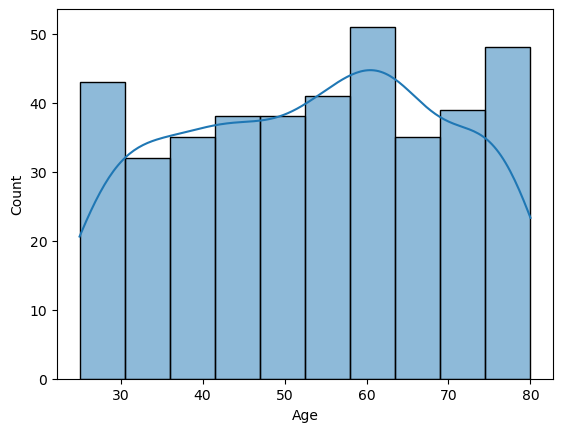

In [13]:
# Histogram for Age
sns.histplot(df, x = 'Age', kde = True)

<Axes: xlabel='Education', ylabel='count'>

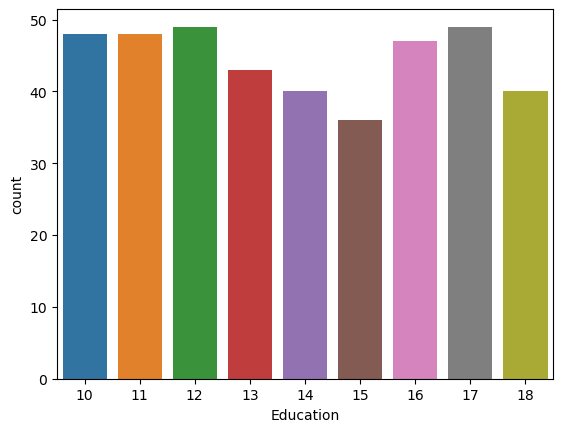

In [14]:
# countplot for Education
sns.countplot(df, x = 'Education')

Education is also a categorical feature

<Axes: xlabel='Urban', ylabel='count'>

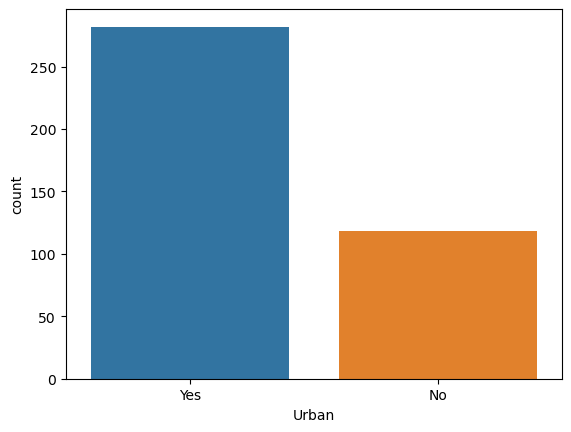

In [15]:
# countplot for Urban
sns.countplot(df, x = 'Urban')

<Axes: xlabel='US', ylabel='count'>

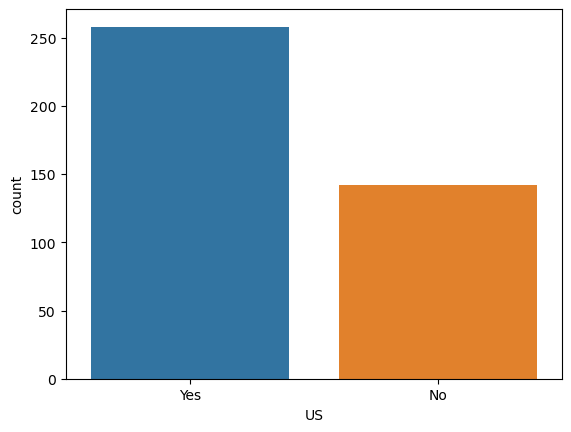

In [16]:
# countplot for US
sns.countplot(df, x = 'US')

## Feature Engineering

In [17]:
# Seperating Sales into 3 categories based on equal quantile ranges
df['Sales'] = pd.cut(df.Sales, bins = [-1, df.Sales.quantile(1/3), df.Sales.quantile(2/3), df.Sales.max() + 1], labels = ['Low', 'Medium', 'High'])

<Axes: xlabel='Sales', ylabel='count'>

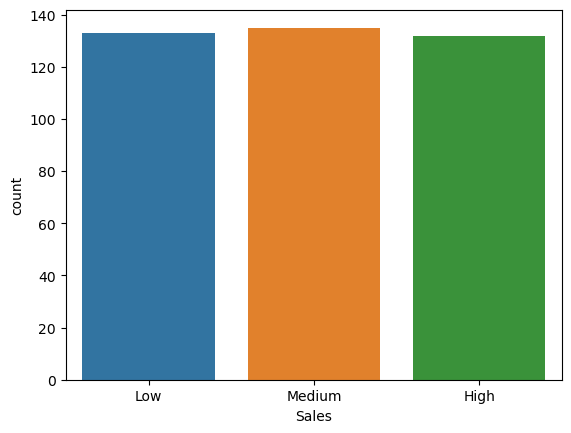

In [18]:
# Countplot for Sales
sns.countplot(df, x = 'Sales')

The target classes are balanced

In [19]:
# Label encoding categorical features
df.US.replace({'Yes':1, 'No':0}, inplace=True)
df.Urban.replace({'Yes':1, 'No':0}, inplace=True)
df.ShelveLoc.replace({'Good':2, 'Medium':1, 'Bad':0}, inplace=True)
df.Sales.replace({'High':2, 'Medium':1, 'Low':0}, inplace=True)

## Hyperparameter Tuning

In [20]:
# Splitting data into dependent and independent variables
X = df.drop(columns='Sales')
y = df.Sales

In [27]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state= 42)

In [26]:
# Importing required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [28]:
# Creating a Random Forest Classifier
rfc = RandomForestClassifier(max_features = 'sqrt', oob_score = True, n_jobs = -1, random_state= 42, class_weight='balanced_subsample')

In [29]:
# Fitting to Random Forest Classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       oob_score=True, random_state=42)

In [30]:
# Getting out-of-bag score
rfc.oob_score_

0.65

In [31]:
# Getting training accuracy
rfc.score(X_train, y_train)

1.0

In [32]:
# Getting test accuracy
rfc.score(X_test, y_test)

0.65

In [33]:
# Defining parameter values for grid search
param_grid = {
    'n_estimators' : [10, 50, 100, 150, 200],
    'criterion' : ["gini", "entropy"],
    'max_features' : [i for i in range(1, X.shape[1] + 1)],
    'class_weight' :["balanced", "balanced_subsample", None] 
}

In [35]:
# Redifining Random Forest Classifier for grid search
rfc = RandomForestClassifier(n_jobs = -1, random_state= 42)

In [37]:
# Creating a Grid Search object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs = -1, cv = 4)

In [38]:
# Running grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample',
                                          None],
                         'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [39]:
# Getting best score from grid search
grid.best_score_

0.6633333333333333

In [40]:
# Getting parameter that gave the best score
grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 6,
 'n_estimators': 100}

In [45]:
# Cross validation report
pd.DataFrame(grid.cv_results_)[['param_class_weight', 'param_criterion','param_max_features', 'param_n_estimators','mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(20)

,param_class_weight,param_criterion,param_max_features,param_n_estimators,mean_test_score,rank_test_score
127,balanced_subsample,gini,6,100,0.663333,1
234,None,gini,7,200,0.660000,2
62,balanced,entropy,3,100,0.656667,3
146,balanced_subsample,gini,10,50,0.656667,4
147,balanced_subsample,gini,10,100,0.653333,5
148,balanced_subsample,gini,10,150,0.653333,5
143,balanced_subsample,gini,9,150,0.650000,7
128,balanced_subsample,gini,6,150,0.650000,8
78,balanced,entropy,6,150,0.650000,8
149,balanced_subsample,gini,10,200,0.650000,10


We will select balanced_subsample as class_weight and gini as criterion, and run grid search again

In [46]:
# Defining parameter values for grid search
param_grid = {
    'n_estimators' : [i for i in range(75, 230, 5)],
    'criterion' : ["gini"],
    'max_features' : [i for i in range(1, X.shape[1] + 1)],
    'class_weight' :["balanced_subsample"] 
}

In [47]:
# Redifining Random Forest Classifier for grid search
rfc = RandomForestClassifier(n_jobs = -1, random_state= 42)

In [48]:
# Creating a Grid Search object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs = -1, cv = 4)

In [49]:
# Running grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced_subsample'],
                         'criterion': ['gini'],
                         'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [75, 80, 85, 90, 95, 100, 105, 110,
                                          115, 120, 125, 130, 135, 140, 145,
                                          150, 155, 160, 165, 170, 175, 180,
                                          185, 190, 195, 200, 205, 210, 215,
                                          220, ...]})

In [50]:
# Getting best score from grid search
grid.best_score_

0.6766666666666667

In [51]:
# Getting parameter that gave the best score
grid.best_params_

{'class_weight': 'balanced_subsample',
 'criterion': 'gini',
 'max_features': 6,
 'n_estimators': 90}

In [52]:
# Cross validation report
pd.DataFrame(grid.cv_results_)[['param_class_weight', 'param_criterion','param_max_features', 'param_n_estimators','mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(20)

,param_class_weight,param_criterion,param_max_features,param_n_estimators,mean_test_score,rank_test_score
158,balanced_subsample,gini,6,90,0.676667,1
157,balanced_subsample,gini,6,85,0.673333,2
159,balanced_subsample,gini,6,95,0.670000,3
162,balanced_subsample,gini,6,110,0.666667,4
155,balanced_subsample,gini,6,75,0.663333,5
160,balanced_subsample,gini,6,100,0.663333,6
283,balanced_subsample,gini,10,95,0.663333,6
285,balanced_subsample,gini,10,105,0.663333,6
166,balanced_subsample,gini,6,130,0.663333,6
163,balanced_subsample,gini,6,115,0.660000,10


## Model Training and Testing

In [53]:
# Redifining Random Forest Classifier for grid search
rfc = RandomForestClassifier(n_estimators= 90, max_features= 6, class_weight='balanced_subsample', oob_score = True, n_jobs = -1, random_state= 42)

In [54]:
# Fitting training data to the model
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', max_features=6,
                       n_estimators=90, n_jobs=-1, oob_score=True,
                       random_state=42)

In [55]:
# Getting out-of-bag score
rfc.oob_score_

0.65

In [56]:
# Score for training data
rfc.score(X_train, y_train)

1.0

In [57]:
# Score for testing data
rfc.score(X_test, y_test)

0.7

In [58]:
# Classification report for testing data predictions
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.69      0.73        32
           1       0.55      0.66      0.60        32
           2       0.79      0.75      0.77        36

    accuracy                           0.70       100
   macro avg       0.71      0.70      0.70       100
weighted avg       0.71      0.70      0.70       100



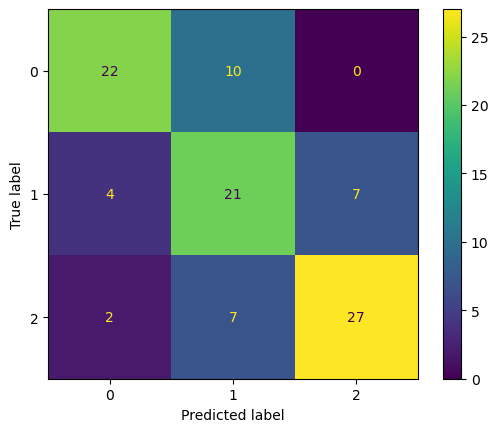

In [60]:
# Confusion Matrix for test data predictions
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc.predict(X_test))).plot()

## Feature Selection

In [67]:
# Feature importances
pd.DataFrame(rfc.feature_importances_, rfc.feature_names_in_).sort_values(0, ascending=False)

,0
Price,0.216530
ShelveLoc,0.146099
CompPrice,0.136516
Age,0.119592
Income,0.111759
Advertising,0.096951
Population,0.087466
Education,0.060582
US,0.013112
Urban,0.011394


Let us try with features with atleast 10% importance

In [69]:
# Selecting important features
X_new = X[['Price', 'ShelveLoc', 'CompPrice', 'Age', 'Income']]

In [70]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, random_state=42)

In [71]:
# Creating a Random Forest Classifier
rfc = RandomForestClassifier(max_features = 'sqrt', oob_score = True, n_jobs = -1, random_state= 42, class_weight='balanced_subsample')

In [72]:
# Fitting to Random Forest Classifier
rfc.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced_subsample', n_jobs=-1,
                       oob_score=True, random_state=42)

In [73]:
# Getting out-of-bag score
rfc.oob_score_

0.61

In [74]:
# Getting training accuracy
rfc.score(X_train, y_train)

1.0

In [75]:
# Getting test accuracy
rfc.score(X_test, y_test)

0.65

In [83]:
# Defining parameter values for grid search
param_grid = {
    'n_estimators' : [10, 50, 100, 150, 200],
    'criterion' : ["gini", "entropy"],
    'max_features' : [i for i in range(1, X_new.shape[1] + 1)]
}

In [84]:
# Redifining Random Forest Classifier for grid search
rfc = RandomForestClassifier(n_jobs = -1, random_state= 42)

In [85]:
# Creating a Grid Search object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs = -1, cv = 4)

In [86]:
# Running grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': [1, 2, 3, 4, 5],
                         'n_estimators': [10, 50, 100, 150, 200]})

In [87]:
# Getting best score from grid search
grid.best_score_

0.62

In [88]:
# Getting parameter that gave the best score
grid.best_params_

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 50}

In [89]:
# Cross validation report
pd.DataFrame(grid.cv_results_)[['param_criterion','param_max_features', 'param_n_estimators','mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(20)

,param_criterion,param_max_features,param_n_estimators,mean_test_score,rank_test_score
16,gini,4,50,0.620000,1
26,entropy,1,50,0.620000,2
3,gini,1,150,0.616667,3
18,gini,4,150,0.616667,3
31,entropy,2,50,0.606667,5
19,gini,4,200,0.603333,6
17,gini,4,100,0.603333,7
29,entropy,1,200,0.603333,7
4,gini,1,200,0.603333,7
44,entropy,4,200,0.603333,7


We will select gini as criterion, and 4 as max_features run grid search again

In [90]:
# Defining parameter values for grid search
param_grid = {
    'n_estimators' : [i for i in range(40, 260, 10)],
    'criterion' : ["gini"],
    'max_features' : [4]
}

In [91]:
# Redifining Random Forest Classifier for grid search
rfc = RandomForestClassifier(n_jobs = -1, random_state= 42)

In [92]:
# Creating a Grid Search object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, n_jobs = -1, cv = 4)

In [93]:
# Running grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_features': [4],
                         'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120,
                                          130, 140, 150, 160, 170, 180, 190,
                                          200, 210, 220, 230, 240, 250]})

In [94]:
# Getting best score from grid search
grid.best_score_

0.6333333333333333

In [95]:
# Getting parameter that gave the best score
grid.best_params_

{'criterion': 'gini', 'max_features': 4, 'n_estimators': 60}

In [96]:
# Cross validation report
pd.DataFrame(grid.cv_results_)[['param_criterion','param_max_features', 'param_n_estimators','mean_test_score', 'rank_test_score']].sort_values('rank_test_score').head(20)

,param_criterion,param_max_features,param_n_estimators,mean_test_score,rank_test_score
2,gini,4,60,0.633333,1
3,gini,4,70,0.623333,2
1,gini,4,50,0.620000,3
4,gini,4,80,0.620000,3
5,gini,4,90,0.616667,5
8,gini,4,120,0.616667,5
9,gini,4,130,0.616667,5
11,gini,4,150,0.616667,5
10,gini,4,140,0.613333,9
15,gini,4,190,0.613333,10


## Model Training and Testing

In [97]:
# Redifining Random Forest Classifier for grid search
rfc = RandomForestClassifier(n_estimators= 60, max_features= 4, oob_score = True, n_jobs = -1, random_state= 42)

In [98]:
# Fitting training data to the model
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=4, n_estimators=60, n_jobs=-1,
                       oob_score=True, random_state=42)

In [99]:
# Getting out-of-bag score
rfc.oob_score_

0.5966666666666667

In [100]:
# Score for training data
rfc.score(X_train, y_train)

1.0

In [101]:
# Score for testing data
rfc.score(X_test, y_test)

0.65

In [102]:
# Classification report for testing data predictions
print(classification_report(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.71      0.62      0.67        32
           1       0.51      0.62      0.56        32
           2       0.76      0.69      0.72        36

    accuracy                           0.65       100
   macro avg       0.66      0.65      0.65       100
weighted avg       0.67      0.65      0.65       100



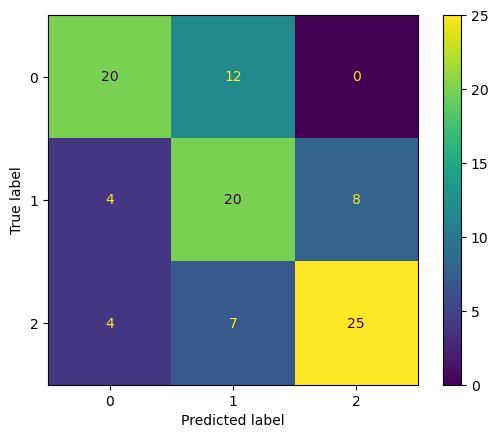

In [103]:
# Confusion Matrix for test data predictions
ConfusionMatrixDisplay(confusion_matrix(y_test, rfc.predict(X_test))).plot()

## Conclusion

- We have divided the target into 3 classes
- We got test accuracy of 65% for default hyperparameters
- Using Hyperparameter Tuning we got optimal hyperparameter values
- Keeping only important features, reduced the test score
- Hyperparameter tuning without eleminating any features, gave us the best score of 70%